# Listagem de revistas e periódicos de contabilidade

**Fonte:** https://anpcont.org.br/periodicos-de-contabilidade/

![ANPCONT](img/anpcont-home.png)

**Bibliotecas importadas**

In [86]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
plt.style.use('seaborn')

In [15]:
url = 'https://anpcont.org.br/periodicos-de-contabilidade/'

In [79]:
def lista_periodicos_anpcont():
    url = 'https://anpcont.org.br/periodicos-de-contabilidade/'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find('table')
    # Captura cabeçalho da tabela como uma lista
    thead = table.find('thead')
    header = ['Url']
    for th in thead.find_all('th'):
        header.append(th.text)
    tbody = table.find('tbody')
    # Captura os dados da tabela como uma lista de listas
    list_data = []
    for tr in tbody.find_all('tr'):
        row = []
        for td in tr.find_all('td'):
            try:
                a = td.find('a', href=True)
                href = a['href']
                row.append(href)
                row.append(a.text)
            except:
                row.append(td.text)
        list_data.append(row)
    # Converte os dados da tabela em um dataframe pandas
    df = pd.DataFrame(list_data, columns=header)
    return df

In [80]:
periodicos_df = lista_periodicos_anpcont()
periodicos_df

,Url,Revista,Instituição,QUALIS
0,http://asaa.anpcont.org.br/index.php/asaa,Advances in Scientific and Applied Accounting ...,ANPCONT,A2
1,http://www.bbronline.com.br/,Brazilian Business Review – BBR,FUCAPE/ES,A2
2,https://revistas.face.ufmg.br/index.php/contab...,Contabilidade Vista & Revista,UFMG/MG,A2
3,http://rbgn.fecap.br/RBGN,Revista Brasileira de Gestão de Negócios – RBGN,FECAP/SP,A2
4,http://rcf.fea.usp.br/,Revista Contabilidade & Finanças (USP),FEA/USP,A2
5,https://periodicos.ufsc.br/index.php/contabili...,Revista Contemporânea de Contabilidade – RCC,UFSC/SC,A2
6,http://www.revistas.usp.br/rco,Revista de Contabilidade e Organizações – RCO,FEA/USP/RP,A2
7,http://proxy.furb.br/ojs/index.php/universocon...,Revista Universo Contábil,FURB/SC,A2
8,http://revistas.unisinos.br/index.php/base,BASE (UNISINOS),UNISINOS/RS,B1
9,http://www.cgg-amg.unb.br/,"Contabilidade, Gestão e Governança – CGG",UnB,B1


In [82]:
periodicos_df.to_csv('data/periodicos_anpcont.csv', index=False)

In [84]:
qualis = periodicos_df['QUALIS'].value_counts()
qualis

A2    8
B2    6
B3    6
B4    6
B1    5
B5    3
C     1
Name: QUALIS, dtype: int64

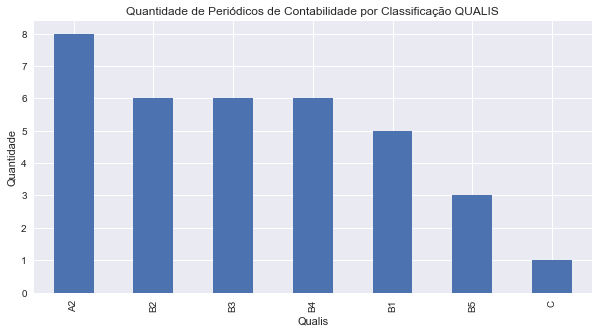

In [95]:
fig, ax = plt.subplots()
ax = qualis.plot.bar(figsize=(10,5), title='Quantidade de Periódicos de Contabilidade por Classificação QUALIS')
ax.set_xlabel('Qualis')
ax.set_ylabel('Quantidade')
plt.show()